# 흡연 여부 예측 해커톤

## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/basic_smoking_class/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/basic_smoking_class/test.csv')
submit = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/basic_smoking_class/sample_submission.csv')

In [2]:
train.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0


In [3]:
test.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
0,TEST_0000,40,165,55,20.20,0.90,1,98,47,75,0.5,229,59,155,13.7,1,1.73
1,TEST_0001,65,145,50,23.78,0.50,0,99,59,98,0.6,200,65,115,12.2,1,1.00
2,TEST_0002,40,160,75,29.30,1.00,0,105,34,232,0.6,170,50,73,15.1,1,1.33
3,TEST_0003,30,180,90,27.78,1.35,0,78,45,218,0.9,197,55,98,15.2,1,0.89
4,TEST_0004,50,155,55,22.89,0.75,0,116,67,139,1.0,230,66,136,15.0,1,0.85


In [ ]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes,columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) *100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    
    return summ
summary(train)  

data shape: (7000, 18)


,data type,#missing,%missing,#unique,min,max
ID,object,0,0.0,7000,NaN,NaN
나이,int64,0,0.0,14,20.0,85.0
키(cm),int64,0,0.0,12,135.0,190.0
몸무게(kg),int64,0,0.0,21,30.0,130.0
BMI,float64,0,0.0,117,14.27,42.45
시력,float64,0,0.0,49,0.1,9.9
충치,int64,0,0.0,2,0.0,1.0
공복 혈당,int64,0,0.0,172,57.0,386.0
혈압,int64,0,0.0,70,14.0,91.0
중성 지방,int64,0,0.0,371,21.0,999.0


In [10]:
train = train.drop('ID',axis=1)
test = test.drop('ID',axis=1)

## EDA
 - no missing values

### 0. label

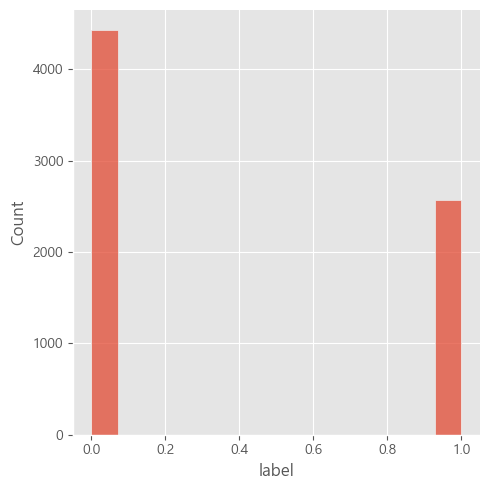

In [ ]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.displot(train['label'])

### 1. 나이

<Axes: xlabel='나이', ylabel='Count'>

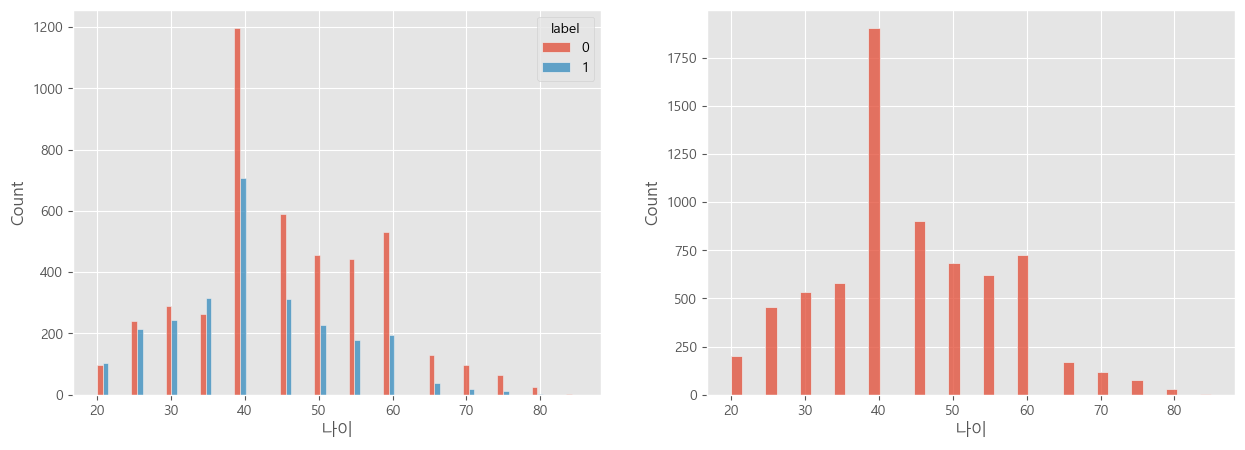

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(x=train['나이'], hue=train['label'], multiple='dodge', ax=axes[0])
sns.histplot(train['나이'], ax=axes[1])


### 2. 키(cm) , 몸무게(kg), BMI
- 키,몸무게를 5단위로 끊어놓음 -> 약간 범주형 변수처럼 해놓음
    - 하지만 분명히 숫자간 대소가 존재함.
- BMI는 키,몸무게로 계산이 가능함. => 삭제 or 범주형 변수로 바꿔도 될듯?

<Axes: xlabel='키(cm)', ylabel='Count'>

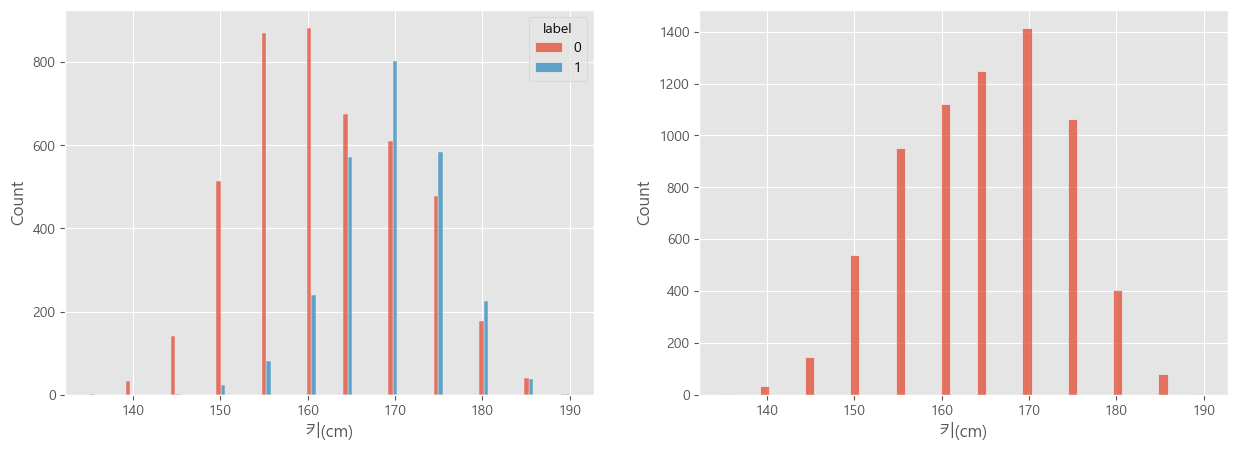

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(x=train['키(cm)'], hue=train['label'], multiple='dodge', ax=axes[0])
sns.histplot(train['키(cm)'], ax=axes[1])


<Axes: xlabel='BMI', ylabel='Count'>

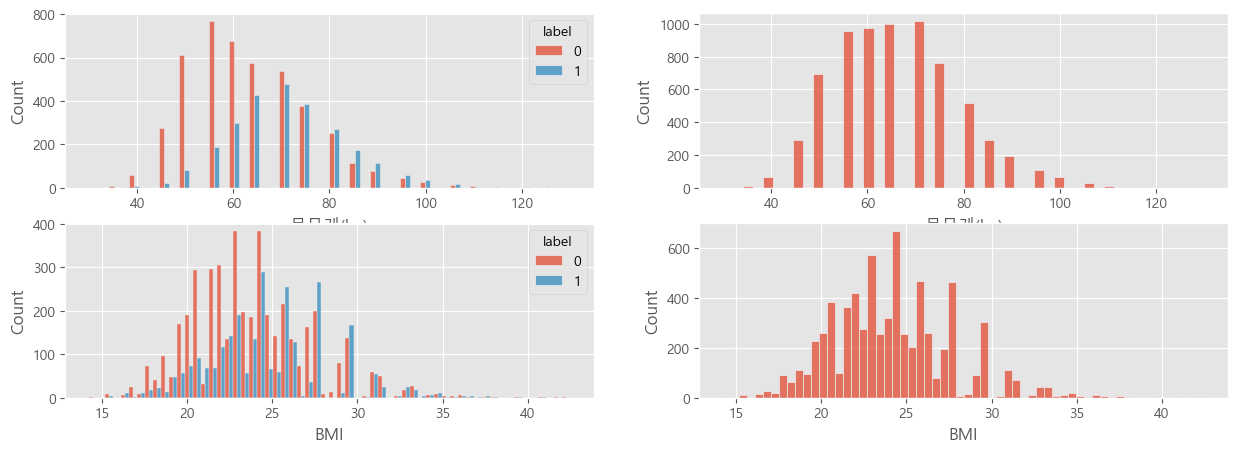

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

sns.histplot(x=train['몸무게(kg)'], hue=train['label'], multiple='dodge', ax=axes[0,0])
sns.histplot(train['몸무게(kg)'], ax=axes[0,1])
sns.histplot(x=train['BMI'], hue=train['label'], multiple='dodge', ax=axes[1,0])
sns.histplot(train['BMI'], ax=axes[1,1])
